# Assignment 3: EDA, Visualization, Regular Expressions, and SQL

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Author**: *Alexandre Makhmudyantsev*

**Collaborators**: *None*

## Scoring Breakdown

|Question|Points|
|---|---|
|1.1|10|
|1.2|10|
|1.3|10|
|1.4|10|
|2|30|
|3.1|10|
|3.2|10|
|3.3|10|
|**Total**|100|

In [17]:
# Necessary imports
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import warnings


warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [19]:
#Initialize the required dataframes to use for the subsequent problems
bus_df = pd.read_csv('./data/bus.csv')
ins2vio_df = pd.read_csv('./data/ins2vio.csv')
ins_df = pd.read_csv('./data/ins.csv')
vio_df = pd.read_csv('./data/vio.csv')

In [20]:
bus_df

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675
...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085


In [21]:
# Used for exercise 2
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6253 entries, 0 to 6252
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business id column  6253 non-null   int64  
 1   name                6253 non-null   object 
 2   address             6253 non-null   object 
 3   city                6253 non-null   object 
 4   state               6253 non-null   object 
 5   postal_code         6253 non-null   object 
 6   latitude            6253 non-null   float64
 7   longitude           6253 non-null   float64
 8   phone_number        6253 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 439.8+ KB


In [22]:
ins2vio_df.head()

,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138


In [23]:
ins_df.head()


,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


In [24]:
vio_df.head()

,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123


## Part 1: EDA

Use the business dataset (bus) to answer the Part 1 questions.

1.1. Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.


##### 1: Counting frequency of values

In [25]:
# Count the frequency of each unique Business ID in the 'business id column' ; series is returned in in descending order
business_id_counts = bus_df['business id column'].value_counts()

# If the max value is over 1 then there are duplicates otherwise there is not
any_duplicates = business_id_counts.max() > 1

# Display results
business_id_counts, any_duplicates

(business id column
 1000     1
 84541    1
 84711    1
 84708    1
 847      1
         ..
 59691    1
 5968     1
 5966     1
 59651    1
 99993    1
 Name: count, Length: 6253, dtype: int64,
 False)

##### 2: Comparing length of unique id's list and length of dataframe

In [26]:
# Get an list of unique Business IDs from the 'business id column'
unique_business_ids = bus_df['business id column'].unique()

# Retrieve the total number of unique Business IDs
length_of_df = len(unique_business_ids)

# Check if the number of unique Business IDs is equal to the total number of records in the DataFrame
business_id_is_unique = len(unique_business_ids) == len(bus_df)

# Display the results
len(unique_business_ids), len(bus_df), business_id_is_unique, 

(6253, 6253, True)

1.2. In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 5 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 5 addressses where businesses are located, from most popular to least popular.

Hint: you may find `value_counts()` helpful. 

In [27]:
# Use value_counts to count the occurrences of each 'name' and return a series in descending order
top_names_counts = bus_df['name'].value_counts()

# Take the first 5 entries in the Series to get the top 5 names with the highest counts
top_5_names_counts = top_names_counts.head(5)

# Convert the series to a list and create a numpy array of the top five names
top_5_names_counts_arr = np.array(top_5_names_counts.index.tolist())

top_5_names_counts_arr

array(["Peet's Coffee & Tea", 'Starbucks Coffee', "McDonald's",
       'Jamba Juice', 'STARBUCKS'], dtype='<U19')

In [28]:
# Use value_counts to count the occurrences of each 'address' and return a series in descending order
top_addresses_counts = bus_df['address'].value_counts()

# Take the first 5 entries in the Series to get the top 5 addresses with the highest counts
top_5_addresses_counts = top_addresses_counts.head(5)

# Convert the series to a list and create a numpy array of the top five addresses
top_5_addresses_counts_arr = np.array(top_5_addresses_counts.index.tolist())

top_5_addresses_counts_arr

array(['Off The Grid', '428 11th St', '2948 Folsom St', '3251 20th Ave',
       'Pier 41'], dtype='<U14')

1.3. In the following cell, construct a series that counts the number of businesses at each address that have likely MISSING postal code value (i.e. postal_code=-9999). Order the series in descending order by count.

In [29]:
missing_postal_codes_count = bus_df[bus_df['postal_code'] == '-9999'].groupby('address').size().sort_values(ascending=False)

missing_postal_codes_count

address
Off The Grid                                39
Off the Grid                                10
OTG                                          4
Approved Locations                           3
Approved Private Locations                   3
                                            ..
24 Willie Mays Pl Room 2142                  1
24 Willie Mays Pl Rm 2103                    1
24 Willie Mays Pl Field Level Rm 1.11.11     1
2399 Van Ness Ave                            1
Various Farmers Markets                      1
Length: 135, dtype: int64

1.4. Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

In [30]:
# Function to extract first 5 digits or set to None for "missing" postal code
def get_first_5_digits(postal_code):

    # Note: This did not for some reason so I had to use the alternate below (I believe since the field is an object data type)
    # if postal_code == -9999:

    # Convert postal_code to string for comparison
    postal_str = str(postal_code).strip()

    # Check if the string matches the invalid postal code otherwise return the first 5 digits
    # Note : I also checked the length because I noticed there were a few edge cases such as 941, CA, and Ca within te postal_code
    if postal_str == '-9999' or len(postal_str) < 5:
        return None
    else:
        return str(postal_code)[:5]

# Apply this function to the postal_code column to create the postal5 column
bus_df['postal5'] = bus_df['postal_code'].apply(get_first_5_digits)

# Filter the dataframe for values where inputs are invalid in order to check the function
filtered_df = bus_df.loc[(bus_df['postal_code'] == "-9999") | (bus_df['postal_code'].astype(str).str.len() != 5)]

# Display the filtered DataFrame
filtered_df

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.0,-9999.0,14154324000,94105
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.0,-9999.0,14155868318,94122
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.0,-9999.0,14155614215,94117
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
...,...,...,...,...,...,...,...,...,...,...
6078,98788,333 Truck,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
6173,99369,HOTEL BIRON,45 ROSE ST,San Francisco,CA,94102-5917,-9999.0,-9999.0,14155700403,94102
6174,99376,Mashallah Halal Food truck Ind,Off The Grid,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None
6199,99536,FAITH SANDWICH #2,560 MISSION ST,San Francisco,CA,94105-2907,-9999.0,-9999.0,14155256783,94105


## Part 2: Visualization

Using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

- Create a side-by-side boxplot like what you see in the figure that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

*Hint: Consider using appropriate JOIN operations.*

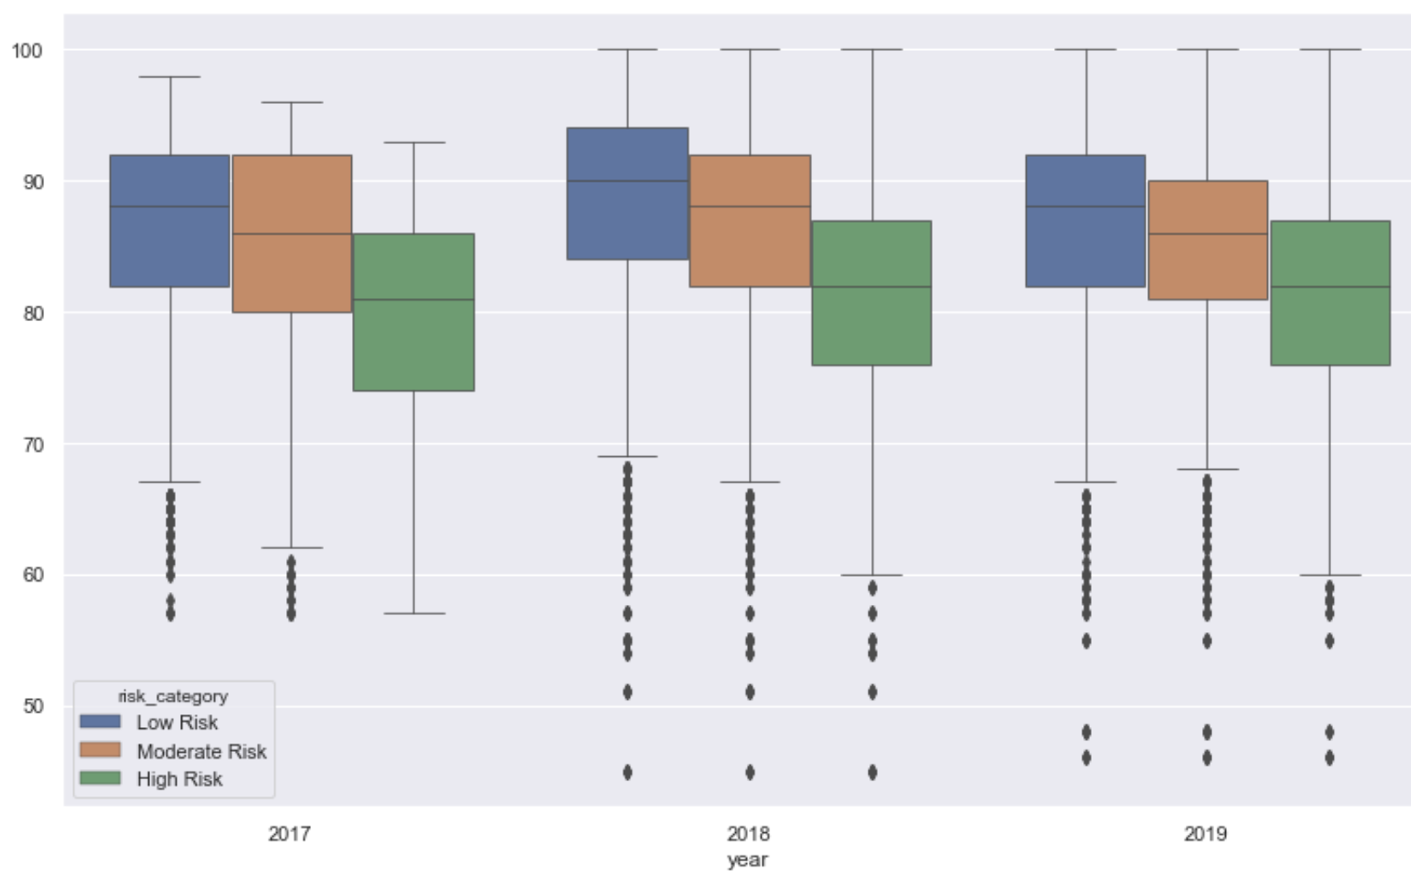

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

Comment on the code above :

This is not good practice but I removed filter warning for seaborn for output clarity. There seems to be an issue open for this warning, listed below, but even after upgrading I still got this error.

*https://github.com/mwaskom/seaborn/issues/3462#issuecomment-1742056756*

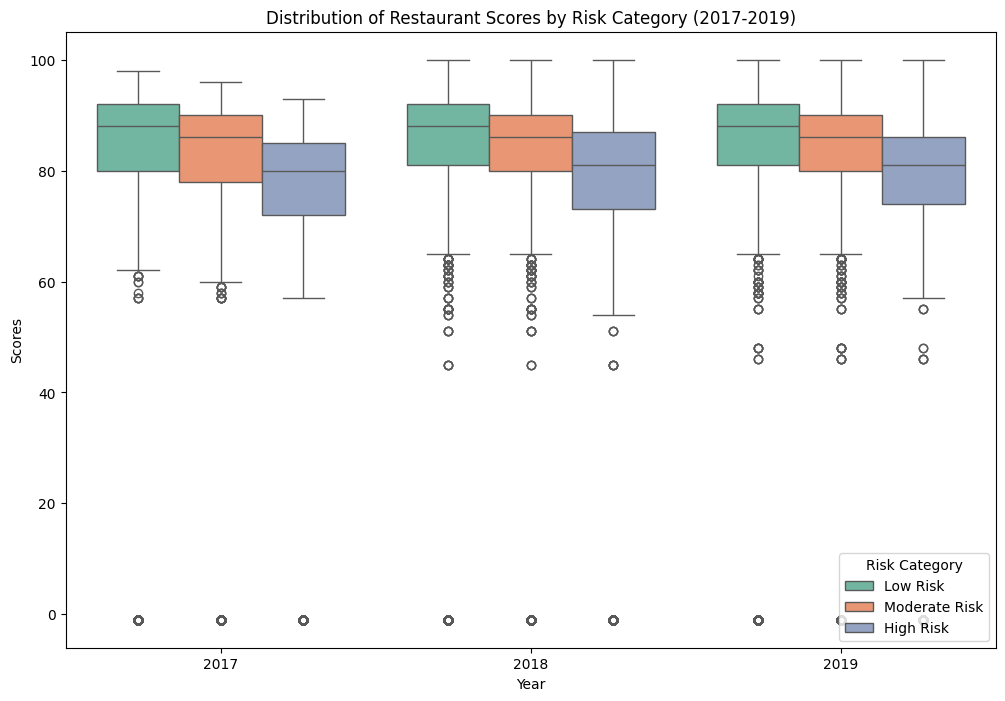

In [34]:
# Note: The only time series data is within the ins_df based off analyzing the data in the beginning of the notebook

# Convert the date feature to datetime 
# Used format as there is specific structure in the data which could not be inferred 
ins_df['date'] = pd.to_datetime(ins_df['date'], format='%m/%d/%Y %I:%M:%S %p')

# Filter teh date within the desired range
ins_df = ins_df[(ins_df['date'].dt.year >= 2017) & (ins_df['date'].dt.year <= 2019)]

# Merge the dataframes to get risk categories associated with scores
# Use left joins to ensure all inspections are included
merged_df = pd.merge(ins_df, ins2vio_df, on='iid', how='left')
merged_df = pd.merge(merged_df, vio_df, on='vid', how='left')

# Create a new column for year for easier plotting
merged_df['year'] = merged_df['date'].dt.year

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='score', hue='risk_category', data=merged_df, palette='Set2')

# Plot the graph
plt.legend(title='Risk Category', loc='lower right')
plt.title('Distribution of Restaurant Scores by Risk Category (2017-2019)')
plt.ylabel('Scores')
plt.xlabel('Year')
plt.show()

## Part 3: SQL

I had some 

Using the tables created using the files found in "database_creation_files.zip" in week 8, write the queries that will return the appropriate results

3.1 Write a SQL query that returns just the unique names of the countries that have English as a language and gained their independence on or after the year 1990?

3.2. Write a SQL query, using the "HAVING" clause, that produces the list of countries that have greater than 10 languages. Group by "CountryCode" and order by language count descending.

3.3. Write a SQL query that returns the Country name, City name, and the number of non-English languages for countries that meet all of the following criteria:

- Countries with over 5 non-English languages
- Countries with a population of less than or equal to 10M
- Cities with a population greater than 1M
- list in descending order for the number of non-English languages